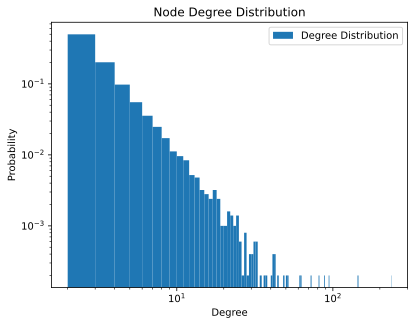

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import poisson
from itertools import combinations  # Importa combinations desde itertools
%config InlineBackend.figure_format = 'svg' # figuras alta calidad jupyter

def generate_barabasi_albert(n:int, m:int):
    """
    Genera un grafo libre de escala utilizando el modelo Barabási-Albert.

    Parámetros:
    - n (int): Número de nodos.
    - m (int): Número de enlaces que se añaden a cada nodo nuevo.

    Return:
    - networkx.Graph: Grafo libre de escala 
    """
    G = nx.Graph()

    # Agregar m nodos iniciales, formando un grafo completo
    initial_nodes = range(m)
    G.add_nodes_from(initial_nodes)
    G.add_edges_from(combinations(initial_nodes, 2))

    # Agregar nodos restantes con enlaces a nodos existentes según la regla Barabási-Albert
    for i in range(m, n):
        # Calcular la probabilidad de conexión para cada nodo existente
        node_probs = np.array([G.degree(node) for node in G.nodes()]) / (2 * len(G.edges()))

        # Seleccionar m nodos existentes para conectar con el nuevo nodo
        targets = np.random.choice(list(G.nodes()), m, replace=False, p=node_probs)
        
        # Agregar enlaces entre el nuevo nodo y los nodos seleccionados
        G.add_node(i)
        G.add_edges_from([(i, t) for t in targets])

    return G

def degree_distribution(adjacency_matrix):
    degree_distribution = np.sum(adjacency_matrix, axis=0)
    return degree_distribution

def plot_degree_distribution(G):

   # Calcula la distribución de grados de los nodos
    degree_sequence = [d for n, d in G.degree()]

    # Grafica la distribución de grados y la distribución de Poisson ajustada
    plt.hist(degree_sequence, bins=np.arange(min(degree_sequence), max(degree_sequence) + 1), density=True, label='Degree Distribution')
    plt.title('Node Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Probability')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    
def plot_Network(G):
    fig = plt.figure("Degree of a random graph", figsize=(6, 6))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Scale-free Network")
    ax0.set_axis_off()    

    
# Parámetros del modelo Barabási-Albert
n = 5000   # Número de nodos
m = 2      # Número de enlaces que se añaden a cada nodo nuevo

# Generar el grafo libre de escala
scale_free_graph = generate_barabasi_albert(n, m)

# Distribucion 
plot_degree_distribution(scale_free_graph)

# Graficar el grafo
#plot_Network(scale_free_graph)
